# Practical example of a confounder

---



We are examining a hypothetical dataset to investigate the impact of a biomarker level on the presence of a disease. Additionally, we consider the role of age as a potential confounder—a variable that might influence both the biomarker levels and the likelihood of disease presence. A confounder can obscure the true relationship between the variable of interest and the outcome if not properly accounted for in the analysis.

Logistic regression—a statistical method for modeling binary outcomes—is used to assess the predictive value of biomarker levels for the disease while adjusting for age. Through a comparative approach, we scrutinize the model's performance with and without the inclusion of age, to understand its confounding effect and to gain clearer insights into the factors contributing to disease presence.



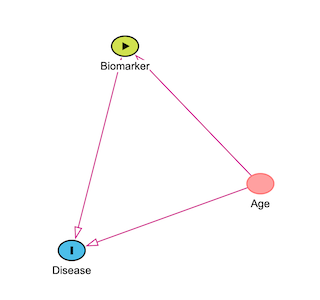

In [11]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import statsmodels.api as sm
import dowhy.api

from IPython.display import Image, display

## Scenario 1: Not taking confounder into consideration

In [38]:
# Seed for reproducibility
np.random.seed(42)

# Number of samples
n = 100

# Generate age as a predictor with a clear effect
age = np.random.randint(20, 80, size=n)

# Simulate biomarker level with a stronger linear relationship to age
biomarker_level = 0.1 * age + np.random.normal(0, 0.3, size=n)

# Generate a logistic relationship with disease presence
# Increase the effect size for age and biomarker_level
logit_p = -5 + 0.15 * age + 1.2 * biomarker_level
probabilities = 1 / (1 + np.exp(-logit_p))

# Binomial outcome for disease presence
disease_presence = np.random.binomial(1, probabilities, size=n)

# Creating DataFrame
data = pd.DataFrame({
    'age': age,
    'biomarker_level': biomarker_level,
    'disease_presence': disease_presence
})

In [18]:
data.head()

,age,biomarker_level,disease_presence
0,58,6.035660,1
1,71,7.896803,1
2,48,4.879046,1
3,34,3.892531,1
4,62,6.338245,1


In [20]:
# Define the outcome and the features, including the confounder
outcome = 'disease_presence'
features = ['biomarker_level']

# Build the logistic regression model adjusting for the confounder (age)
logit_model = sm.Logit(data[outcome], sm.add_constant(data[features])).fit()

# Display the model summary to see the effect of the biomarker level adjusted for age
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.100436
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:       disease_presence   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.2546
Time:                        21:01:24   Log-Likelihood:                -10.044
converged:                       True   LL-Null:                       -13.474
Covariance Type:            nonrobust   LLR p-value:                  0.008808
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5319      2.394     -0.640      0.522      -6.225       3.161
biomarker_lev

## Scenario 2: Taking confounder into consideration

In [21]:
# Define the outcome and the features, including the confounder
outcome = 'disease_presence'
features = ['biomarker_level', "age"]

# Build the logistic regression model adjusting for the confounder (age)
logit_model = sm.Logit(data[outcome], sm.add_constant(data[features])).fit()

# Display the model summary to see the effect of the biomarker level adjusted for age
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.066424
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:       disease_presence   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.5070
Time:                        21:01:30   Log-Likelihood:                -6.6424
converged:                       True   LL-Null:                       -13.474
Covariance Type:            nonrobust   LLR p-value:                  0.001079
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.0226      5.353     -0.938      0.348     -15.513       5.468
biomarker_lev

## Comparing Scenario 1 and 2

Comparing the two sets of logistic regression results, we are focusing on the influence of the inclusion of the variable `age` as a predictor in the model, which acts as a confounder.

In the first set of results without `age`:
- The coefficient for `biomarker_level` is 1.4602, with a p-value of 0.092, indicating a trend towards significance but not conventionally significant (p < 0.05).
- The pseudo R-squared value is 0.2546, which suggests that the model explains about 25.46% of the variability in the outcome.
- The model shows evidence of possible quasi-separation, as indicated by the warning message, meaning that the logistic regression model might be too perfect in separating the outcomes, which can cause issues in parameter estimation.

In the second set of results with `age` included:
- The coefficient for `biomarker_level` is -3.3528, which is quite different from the model without `age`. Its p-value is 0.191, indicating that it is not statistically significant.
- The coefficient for `age` is 0.6408 with a p-value of 0.050, right on the edge of conventional levels of significance.
- The pseudo R-squared value has increased to 0.5070, suggesting that adding `age` to the model explains over 50% of the variability in the outcome.
- There is also a warning about possible quasi-separation, but now it indicates a larger fraction of observations (0.53) that can be perfectly predicted, which implies that the issue of separation is more pronounced in this model.

Key Takeaways:
- Including `age` as a confounder changes the coefficients significantly, which suggests that `age` has an important effect on the outcome and was confounding the effect of `biomarker_level`.
- `age` appears to be a significant predictor when included in the model, as its p-value is close to 0.05.
- The model fit improves with the inclusion of `age`, as indicated by the higher pseudo R-squared value.
- The problem of quasi-separation is present in both models but is more pronounced when `age` is included. This indicates that while the model fit has improved, there might still be issues with the logistic regression assumptions due to the presence of predictors that can perfectly predict certain outcomes.
- This complete or quasi-complete separation often occurs when the outcome variable can be perfectly predicted by a combination of predictors, leading to infinite or undefined estimates for the logistic regression coefficients.

The results imply that `age` is an important variable in predicting disease presence, and not accounting for it could lead to a misunderstanding of the effect of `biomarker_level`. However, caution should be taken with the model interpretation due to the warning about quasi-separation. It may be helpful to explore alternative modeling approaches or regularization techniques that can address this issue, such as penalized logistic regression.

## Causal Model and Propensity Score

In order to test the practical example, the datasets and parameters have been slightly modified below.

In [2]:
!pip install dowhy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 6.6 MB/s eta 0:00:00


In [79]:
# Seed for reproducibility
np.random.seed(42)

# Generating a dataset
n = 1000  # number of samples
gender = np.random.binomial(1, 0.5, size=n)  # binary gender (0 or 1) with equal probability
biomarker_level = 0.5 * gender + np.random.normal(0, 0.5, size=n)  # linear relation with some noise
logit_p = -3 + 0.2 * gender + 0.5 * biomarker_level  # logistic regression equation for disease
probabilities = 1 / (1 + np.exp(-logit_p))
disease_presence = np.random.binomial(1, probabilities, size=n)

# Creating DataFrame
data = pd.DataFrame({
    'gender': gender,
    'biomarker_level': biomarker_level,
    'disease_presence': disease_presence
})
causal_df = data.causal.do(x='biomarker_level',
                          method='weighting',
                          variable_types={'biomarker_level': 'd',
                                          'disease_presence': 'c',
                                          'gender': 'd'},
                          outcome='disease_presence',
                          common_causes=['gender'])

# Printing the causal effect estimate
print(causal_df.head())


   gender  biomarker_level  disease_presence  propensity_score      weight
0       0         0.281955                 0          0.001195  836.549337
1       1         0.530840                 0          0.001200  833.271486
2       0        -0.012098                 0          0.001195  836.549337
3       1         0.476144                 0          0.001200  833.271486
4       0         0.144584                 0          0.001195  836.549337


In [80]:
data['disease_presence'] = data['disease_presence'].astype(int)
data['gender'] = data['gender'].astype(int)

In [81]:
data.head()

,gender,biomarker_level,disease_presence
0,0,0.088851,1
1,1,-0.167672,0
2,1,0.690099,0
3,1,0.805293,0
4,0,0.279895,0


### Causal Model

In [85]:
model = CausalModel(
    data=data,
    treatment='disease_presence',
    outcome='biomarker_level',
    common_causes=['gender']
)

### Causal Analysis

In [86]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                    
───────────────────(E[biomarker_level|gender])
d[disease_presence]                           
Estimand assumption 1, Unconfoundedness: If U→{disease_presence} and U→biomarker_level then P(biomarker_level|disease_presence,gender,U) = P(biomarker_level|disease_presence,gender)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Propensity Score

In [89]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                    
───────────────────(E[biomarker_level|gender])
d[disease_presence]                           
Estimand assumption 1, Unconfoundedness: If U→{disease_presence} and U→biomarker_level then P(biomarker_level|disease_presence,gender,U) = P(biomarker_level|disease_presence,gender)

## Realized estimand
b: biomarker_level~disease_presence+gender
Target units: ate

## Estimate
Mean value: 0.16731520202462752

Causal Estimate is 0.16731520202462752
